# Amercian Community Survey API (센서스 자료)
* API로 센서스 데이터를 받을 수 있습니다.
* 항목도 많고 공간단위도 census tract -> state까지 다양합니다(민감한 경우에는 센서스 트랙 단위는 없는 것도 있어요).
* [ACS-5year-Census](https://www.census.gov/data/developers/data-sets/acs-5year.html)에서 설명서를 확인하실 수 있습니다.
* ACS 1year, 3year, 5year 가 있던데 통계방법 차이인 것 같습니다. 5년이 데이터가 제일 풍부하고 연구자들도 이걸 대부분 사용합니다.

* 뉴욕시에서 NYC FactFinder 라고 ACS 데이터로 플랫폼을 만들어 놓았습니다.
* 이 툴로는 전체적인 분석은 어렵고, 어떤 데이터가 있는지 살펴보시고 이름보고 ACS API를 통해서 자료를 받으시면 되겠습니다.

![image.png](images/img1.png)

- NYC FactFinder UI [Link](https://popfactfinder.planning.nyc.gov/#12.25/40.724/-73.9868)

![image.png](images/img2.png)

* Census Tract를 클릭했을 때 살펴볼 수 있는 항목들, 여기서 필요한 변수를 찾아서 API를 통해 받으시면 되겠습니다.

In [2]:
# 파이썬 패키지들 입니다.
# 아나콘다로 사용하는걸 추천드려요.
# 아나콘다 패키지 설치는
# conda install [package name]
# 입니다.
# e.g. conda install geopandas
# 패키지 이름을 모르면 구글에다가 비슷한 이름으로 검색하시면되요. e.g. conda geopandas

%matplotlib inline
import os

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt

import matplotlib.pyplot as plt

In [3]:
# 변수 종류입니다. 엄청 많습니다.
df = pd.read_json('https://api.census.gov/data/2017/acs/acs5/variables.json')

In [4]:
df = df.reset_index()

In [5]:
var_names = [(var,f['label']) for var,f in zip(df['index'], df['variables'])]

In [6]:
var_names[:10] # 변수종류: 연령, 인종, commuting time, transportation mode 등

[('AIANHH', 'Geography'),
 ('AIHHTL', 'Geography'),
 ('AIRES', 'Geography'),
 ('ANRC', 'Geography'),
 ('B00001_001E', 'Estimate!!Total'),
 ('B00002_001E', 'Estimate!!Total'),
 ('B01001A_001E', 'Estimate!!Total'),
 ('B01001A_002E', 'Estimate!!Total!!Male'),
 ('B01001A_003E', 'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001A_004E', 'Estimate!!Total!!Male!!5 to 9 years')]

In [9]:
print('ACS에 있는 변수는 총 {}개 입니다.'.format(len(var_names)))

ACS에 있는 변수는 총 25110개 입니다.


In [10]:
# Korean 항목이 있는지 한번 보겠습니다.
korean_var = []
for i in range(len(var_names)):
    if 'Korean' in var_names[i][1]:
        print(var_names[i])

('B02015_012E', 'Estimate!!Total!!Korean')
('B02018_012E', 'Estimate!!Total Groups Tallied!!Korean')
('B16001_081E', 'Estimate!!Total!!Korean')
('B16001_082E', 'Estimate!!Total!!Korean!!Speak English very well')
('B16001_083E', 'Estimate!!Total!!Korean!!Speak English less than very well')
('B21002_007E', 'Estimate!!Total!!Vietnam Era no Korean War no World War II')
('B21002_008E', 'Estimate!!Total!!Vietnam Era and Korean War no World War II')
('B21002_009E', 'Estimate!!Total!!Vietnam Era and Korean War and World War II')
('B21002_010E', 'Estimate!!Total!!Korean War no Vietnam Era no World War II')
('B21002_011E', 'Estimate!!Total!!Korean War and World War II no Vietnam Era')
('B21002_012E', 'Estimate!!Total!!World War II no Korean War no Vietnam Era')
('B21002_014E', 'Estimate!!Total!!Between Vietnam Era and Korean War only')
('B21002_015E', 'Estimate!!Total!!Between Korean War and World War II only')
('C16001_018E', 'Estimate!!Total!!Korean')
('C16001_019E', 'Estimate!!Total!!Korean!!

In [11]:
# list(map(lambda v:var_names[v],korean_var))

In [12]:
# 오.. 토탈 코리안 분포로 한국인들이 어디 사는지 한번 보겠습니다!

# code name: B02015_012E
# NY State Code = 36
# Sample Code는 다음과 같습니다:
# https://api.census.gov/data/2017/acs/acs5?get=B01001_001E,NAME&for=tract:*&in=state:36%20county:*
# 바꿀 부분은 get= 여기에 코드명, for=tract:*는 센서스 트랙 전체라는 뜻입니다. 그리고 in=state:36 은 뉴욕주 안에 county:*
# 카운티에 있다는 뜻입니다.

# 뉴욕주 안 모든 카운티, 모든 센서스 트랙에 있는 B01001_001E 라는 변수를 보여줘라 라는 url 입니다.

url = 'https://api.census.gov/data/2017/acs/acs5?get=B02015_012E,NAME&for=tract:*&in=state:36%20county:*'
kor_pop = pd.read_json(url)
col_name = [n for n in kor_pop.iloc[0]]
kor_pop.columns = col_name
kor_pop.drop(kor_pop.head(1).index, inplace=True)

In [43]:
kor_pop['cd'] = kor_pop.state + kor_pop.county + kor_pop.tract

In [45]:
kor_pop.head()

,B02015_012E,NAME,state,county,tract,cd
1,11,"Census Tract 119, Queens County, New York",36,081,011900,36081011900
2,0,"Census Tract 135, Queens County, New York",36,081,013500,36081013500
3,0,"Census Tract 136, Queens County, New York",36,081,013600,36081013600
4,0,"Census Tract 141, Queens County, New York",36,081,014100,36081014100
5,0,"Census Tract 145, Queens County, New York",36,081,014500,36081014500


## Join할 때 주의사항
* ACS랑 Census Tract랑 행정구역 코드가 조금 헷갈립니다.
* ACS 에는 County가 있고, census tract 대신에 Borough가 있습니다.
* 뉴욕이 도시지역이라서 다른 행정구역하고 달라서 그런 것 같습니다.
* 매칭을 하면
    * Manhattan - New York County
    * Bronx - Bronx County
    * Brooklyn - Kings County
    * Queens - Queens County
    * Staten Island - Richmond County
* 기존에 하시던 방식대로 R로 하셔도 되고 Excel로 하셔도 됩니다.

In [25]:
# URL로 바로 받으실 수도 있습니다.
ct2010 = pd.read_csv('https://data.cityofnewyork.us/api/views/i69b-3rdj/rows.csv?accessType=api', dtype=str)

In [31]:
ct2010.head(1)

,the_geom,BoroName,CTLabel,BoroCode,BoroCT2010,CT2010,CDEligibil,NTACode,NTAName,Shape_Leng,PUMA,Shape_Area
0,(POLYGON ((-74.07920577013245 40.6434307837456...,Staten Island,9,5,5000900,000900,I,SI22,West New Brighton-New Brighton-St. George,7729.01679383,3903,2497009.71359


예를 들어 위 census tract 에 해당하는 ACS 행정구역 코드는 BoroCT2010이나 CT2010이 아니라,<br>
["19750","New York County, New York","36","061"] <br>
뉴욕 <36> 뉴욕 카운티(맨하탄) <061> CT2010 <000900> 가 합쳐져 36061000900 이 되는 것입니다.

In [32]:
ct2010.BoroName.unique()

array(['Staten Island', 'Manhattan', 'Brooklyn', 'Bronx', 'Queens'],
      dtype=object)

In [34]:
ct2010['county'] = None
ct2010['county'][ct2010['BoroName']=='Staten Island'] = '085'
ct2010['county'][ct2010['BoroName']=='Manhattan'] = '061'
ct2010['county'][ct2010['BoroName']=='Brooklyn'] = '047'
ct2010['county'][ct2010['BoroName']=='Bronx'] = '005'
ct2010['county'][ct2010['BoroName']=='Queens'] = '081'

In [36]:
ct2010['cd'] = '36' + ct2010['county'] + ct2010['CT2010']

In [41]:
gdf = gpd.GeoDataFrame(ct2010)
# gdf['the_geom'] = gdf['the_geom'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(gdf, geometry='the_geom')

In [47]:
gdf = gdf.merge(kor_pop, on='cd')

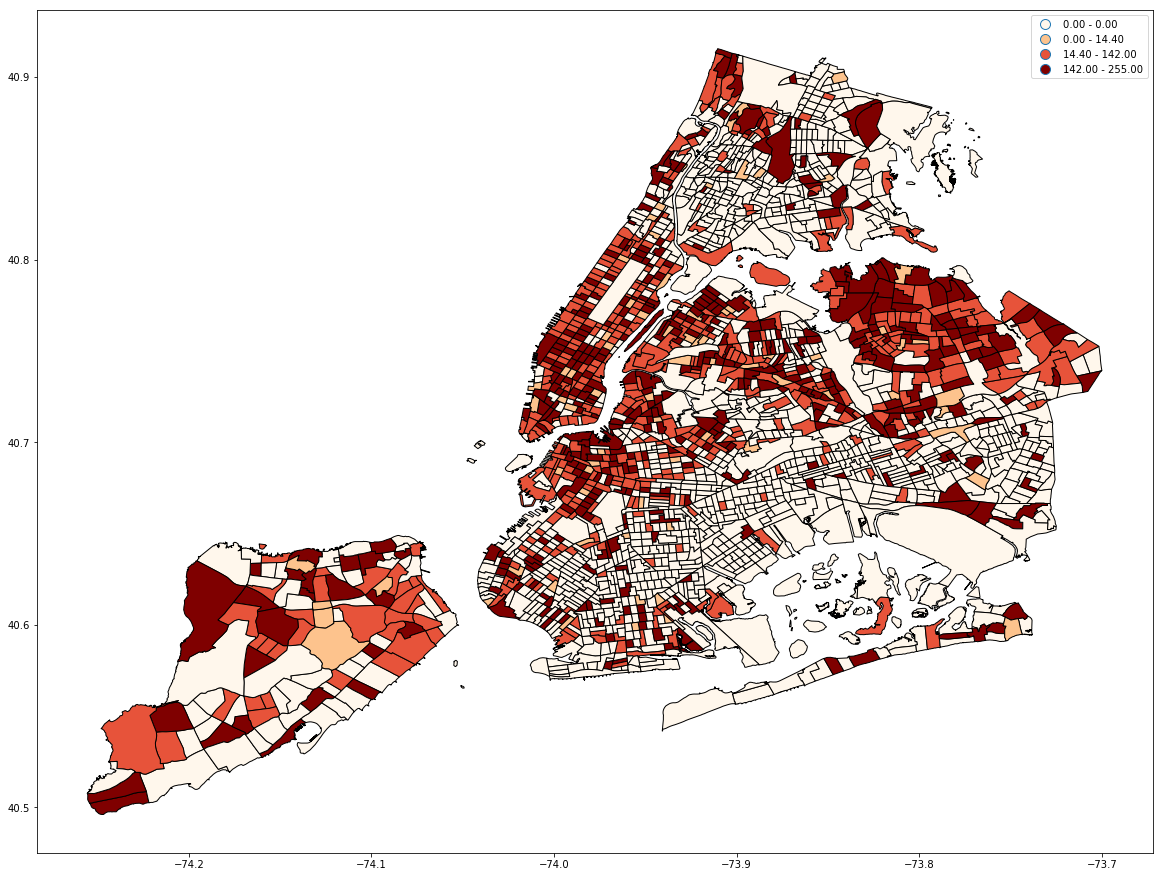

In [55]:
# 시각화는 GIS로 하셔도 무방하겠습니다.
# 데이터 저장은 gdf.to_csv('file_name.csv', index=False) 입니다.
fig, ax = plt.subplots(figsize=(20,20))
gdf.plot(ax=ax, column='B02015_012E', cmap='OrRd', edgecolor='black', scheme='quantiles', legend=True)
plt.show()

    생각보다 맨하탄에 많이 모여사네요. 하지만 다른 인종에 비해서는 역시 총 인구는 적지 않을까 싶습니다.
    3시 방향에 있는 지역이 flushing 지역으로 한인타운이 이민 초기부터 크게 형성되어 있던 곳입니다.